# **Importing necessary libraries**

In [ ]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import jaccard_similarity_score
from sklearn import metrics
from sklearn import preprocessing
import itertools
from sklearn.model_selection import validation_curve
from xgboost import XGBClassifier
import xgboost as xgb
from xgboost import plot_importance
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc
from sklearn.inspection.partial_dependence import partial_dependence, plot_partial_dependence
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

# **Reading our dataset**

In [ ]:
df = pd.read_csv("/content/heart (1).csv")

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Now let us do some Exploratory data analysis

# **Exploratory data analysis**

In [ ]:
df_target = df.groupby("target").size()
df_target

target
0    138
1    165
dtype: int64


Let's see how percentage of the people who has heart disease.

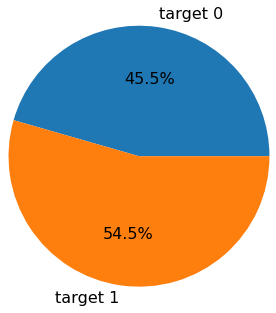

In [ ]:
plt.pie(df_target.values, labels = ["target 0", "target 1"],autopct='%1.1f%%', radius = 1.5, textprops = {"fontsize" : 16}) 
plt.show()

From the above pie chart,we can see that over 50% people were diagnosed with heart disease.

In [ ]:
df_sex = df.groupby(["sex","target"]).size()
df_sex

sex  target
0    0          24
     1          72
1    0         114
     1          93
dtype: int64

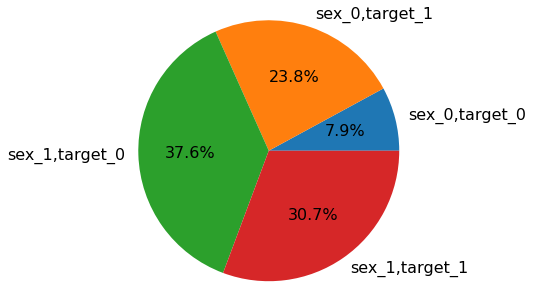

In [ ]:


plt.pie(df_sex.values, labels = ["sex_0,target_0", "sex_0,target_1", "sex_1,target_0", "sex_1,target_1"],autopct='%1.1f%%',radius = 1.5, textprops = {"fontsize" : 16})
plt.show()


The ratio of male has heart disease is 30.7%, a little bit higher than female.

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


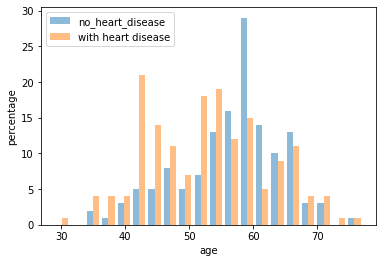

In [ ]:
plt.hist([df[df.target==0].age, df[df.target==1].age], bins = 20, alpha = 0.5, label = ["no_heart_disease","with heart disease"])
plt.xlabel("age")
plt.ylabel("percentage")
plt.legend()
plt.show()

The ratio gets higher over the age of forty. The people who are over forty are under high risk of heart disease.

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


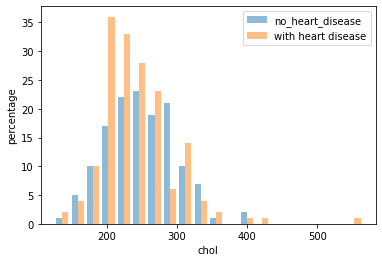

In [ ]:
plt.hist([df[df.target==0].chol, df[df.target==1].chol], bins = 20, alpha = 0.5, label = ["no_heart_disease","with heart disease"])
plt.xlabel("chol")
plt.ylabel("percentage")
plt.legend()
plt.show()


Also, the amounts of people having heart disease have cholestrol over 200mg/dl. According to the research, the normal value of chol should be lower than 200mg/dl.

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


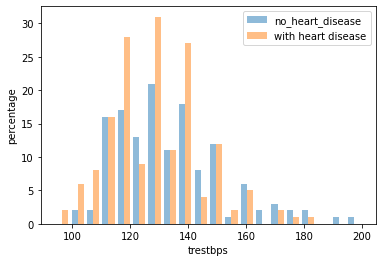

In [ ]:
plt.hist([df[df.target==0].trestbps, df[df.target==1].trestbps], bins = 20, alpha = 0.5, label = ["no_heart_disease","with heart disease"])
plt.xlabel("trestbps")
plt.ylabel("percentage")
plt.legend()
plt.show()

The ideal blood pressure should be lower than 120 mmHg. We can see that over 50% patients have higher blood pressure.

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


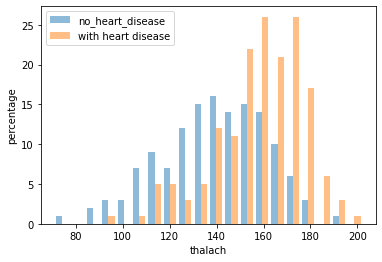

In [ ]:
plt.hist([df[df.target==0].thalach, df[df.target==1].thalach], bins = 20, alpha = 0.5, label = ["no_heart_disease","with heart disease"])
plt.xlabel("thalach")
plt.ylabel("percentage")
plt.legend()
plt.show()

Interesting outcome. It seems that the medium of patient with heart disease is higher. 


# **Feature Engineering**

In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
df_1 = df[["age", "trestbps", "chol", "thalach", "oldpeak"]]
df_1.describe()

,age,trestbps,chol,thalach,oldpeak
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604
std,9.082101,17.538143,51.830751,22.905161,1.161075
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000
75%,61.000000,140.000000,274.500000,166.000000,1.600000
max,77.000000,200.000000,564.000000,202.000000,6.200000


1. From the summary statistics, we can see that ***thal*** takes values between 0 and 3, which is erroneous, since the dataset description mentions it can only take values 3, 6 or 7.

2. ***ca*** from our dataset takes values between 0 and 3, however in the dataset description, it should take values between 1 and 4.

3. ***slope ***from our dataset takes values between 0 and 2, however in the dataset description, it should take values between 1 and 3.





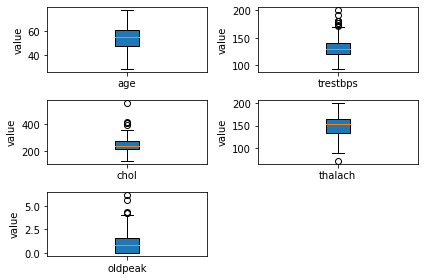

In [ ]:
for item in df_1.columns:
    plt.subplot(3,2,list(df_1.columns).index(item)+1)
    plt.boxplot(df_1[item], patch_artist=True, labels = [item])
    plt.ylabel("value")
plt.tight_layout()
plt.show()

In [ ]:
df['ca'].value_counts()

0    175
1     65
2     38
3     20
4      5
Name: ca, dtype: int64

Here, the missing values take up value **'4'**, which is compromises data quality, since ca can only take integer values between 0 and 3.

Since there are only 5 entries in the dataset which have this error, we will remove them altogether from the dataset.

In [ ]:
df.drop(index = (df[df.ca == 4]).index, inplace = True)

***thal*** also has some missing values: they are represented as **'0'**. We will again remove all entries with such erroneous values from the dataset, in order to maintain a high dataset quality.
The categorical mappings of thal are completely out-of-bounds and scrambled, compared to what is expected (only integer values 3, 6 or 7 should be present).

In [ ]:
df['thal'].value_counts()

2    163
3    115
1     18
0      2
Name: thal, dtype: int64

In [ ]:
#dropping the rows where thal value is 0
df.drop(index = (df[df.thal == 0]).index, inplace = True)

In [ ]:
df.loc[df.thal == 1, 'thal'] = 6
df.loc[df.thal == 3, 'thal'] = 7
df.loc[df.thal == 2, 'thal'] = 3

Now, if we check, we will see that the attribute thal has been cleaned up of its data quality issues, and is represented as expected:

In [ ]:
df['thal'].value_counts()

3    163
7    115
6     18
Name: thal, dtype: int64

In [ ]:
df['cp'].value_counts()

0    141
2     83
1     49
3     23
Name: cp, dtype: int64

In [ ]:
df.loc[df.cp == 0, 'cp'] = 4
df.loc[df.cp == 3, 'cp'] = 7
df.loc[df.cp == 2, 'cp'] = 3
df.loc[df.cp == 1, 'cp'] = 2
df.loc[df.cp == 7, 'cp'] = 1

We will do the same with encoding the values of slope according to the proper categorical encodings:

In [ ]:
df['slope'].value_counts()

2    138
1    137
0     21
Name: slope, dtype: int64

In [ ]:
df.loc[df.slope == 2, 'slope'] = 3
df.loc[df.slope == 1, 'slope'] = 2
df.loc[df.slope == 0, 'slope'] = 1

In [ ]:
df.shape

(296, 14)

In [ ]:
#Now let us see all the numerical values
numerical_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']


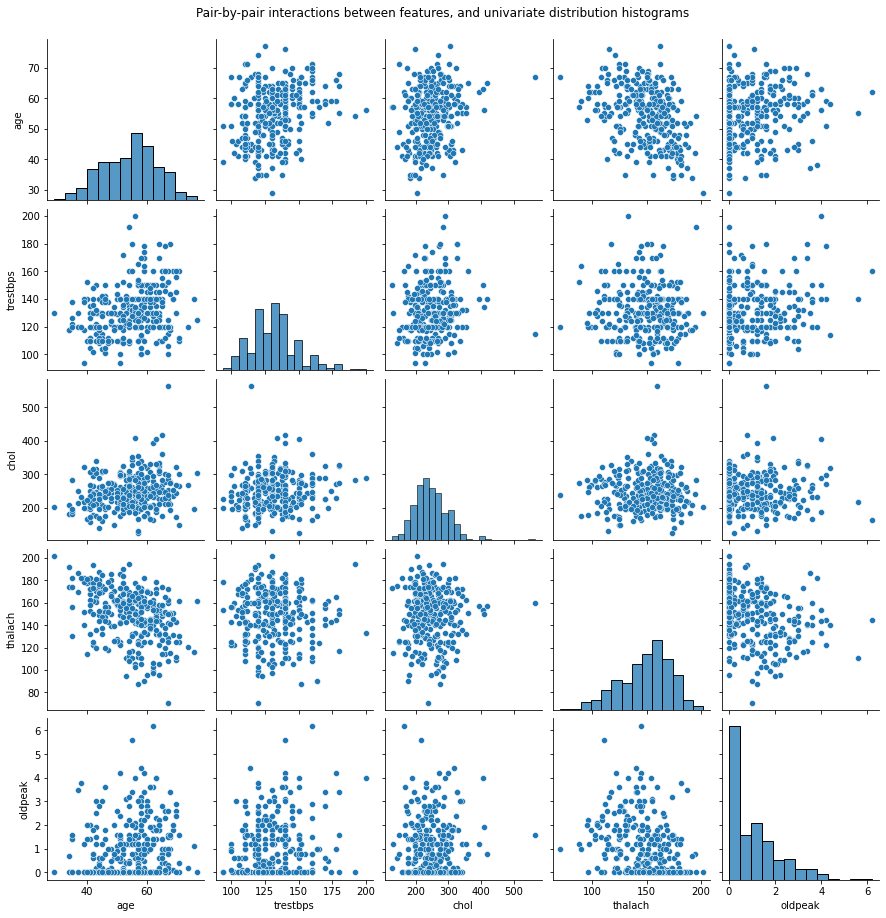

In [ ]:
import seaborn as sb
grid = sb.pairplot(data = df.loc[:, numerical_columns]);
grid.fig.suptitle("Pair-by-pair interactions between features, and univariate distribution histograms", y = 1.02);

Now let us see the correlation among various independent features. If these independent features have extremely positive or extremely negative correlation, then we have to discard those features as training our models on such kind of models will lead to overfitting.

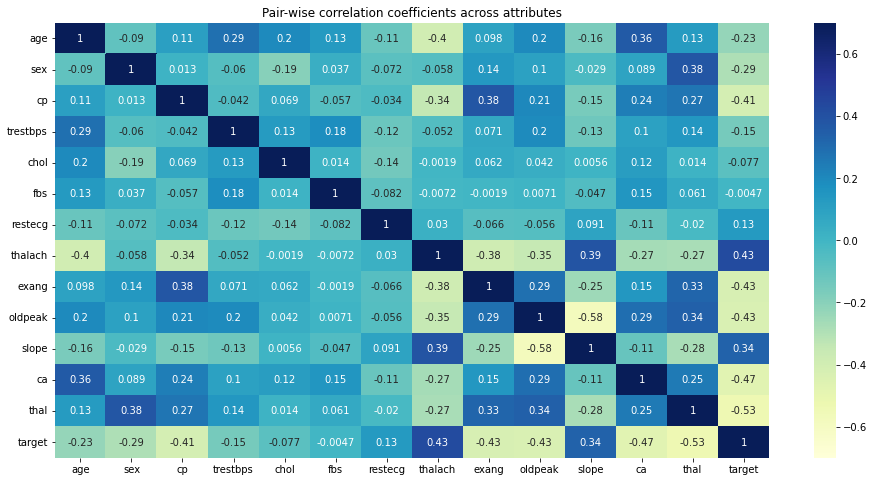

In [ ]:
plt.figure(figsize = [16, 8])

sb.heatmap(df.corr(), cmap = 'YlGnBu', annot = True, vmax = 0.7, vmin = -0.7);
plt.title('Pair-wise correlation coefficients across attributes');

In [ ]:
a = pd.get_dummies(df['cp'], prefix = "cp")
b = pd.get_dummies(df['thal'], prefix = "thal")
c = pd.get_dummies(df['slope'], prefix = "slope")

frames = [df, a, b, c]
df = pd.concat(frames, axis = 1)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,cp_1,cp_2,cp_3,cp_4,thal_3,thal_6,thal_7,slope_1,slope_2,slope_3
0,63,1,1,145,233,1,0,150,0,2.3,1,0,6,1,1,0,0,0,0,1,0,1,0,0
1,37,1,3,130,250,0,1,187,0,3.5,1,0,3,1,0,0,1,0,1,0,0,1,0,0
2,41,0,2,130,204,0,0,172,0,1.4,3,0,3,1,0,1,0,0,1,0,0,0,0,1
3,56,1,2,120,236,0,1,178,0,0.8,3,0,3,1,0,1,0,0,1,0,0,0,0,1
4,57,0,4,120,354,0,1,163,1,0.6,3,0,3,1,0,0,0,1,1,0,0,0,0,1


In [ ]:
df = df.drop(columns = ['cp', 'thal', 'slope'])
df.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,target,cp_1,cp_2,cp_3,cp_4,thal_3,thal_6,thal_7,slope_1,slope_2,slope_3
0,63,1,145,233,1,0,150,0,2.3,0,1,1,0,0,0,0,1,0,1,0,0
1,37,1,130,250,0,1,187,0,3.5,0,1,0,0,1,0,1,0,0,1,0,0
2,41,0,130,204,0,0,172,0,1.4,0,1,0,1,0,0,1,0,0,0,0,1
3,56,1,120,236,0,1,178,0,0.8,0,1,0,1,0,0,1,0,0,0,0,1
4,57,0,120,354,0,1,163,1,0.6,0,1,0,0,0,1,1,0,0,0,0,1


In [ ]:
y = df['target'] 
X = df.drop(['target'], axis = 1) 


In [ ]:
#Normalization
X = (X - np.min(X)) / (np.max(X) - np.min(X)).values

Splitting our dataset into train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0) 

# **Model Training**

In [ ]:
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,KFold,cross_validate,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
kfolds = 4 
split = KFold(n_splits=kfolds, shuffle=True, random_state=42)
base_models = [("DT_model", DecisionTreeClassifier(random_state=42)),
              ("RF_model", RandomForestClassifier(n_estimators=150,random_state=42,n_jobs=-1,)),
               ("LR_model", LogisticRegression(random_state=42,n_jobs=-1)),
               ("XGB_model", XGBClassifier(random_state=42, n_jobs=-1))]
for name,model in base_models:
    clf = model
    cv_results = cross_val_score(clf, 
                                 X_train, y_train, 
                                 cv=split,
                                 scoring="accuracy",
                                 n_jobs=-1)
    min_score = round(min(cv_results), 4)
    max_score = round(max(cv_results), 4)
    mean_score = round(np.mean(cv_results), 4)
    std_dev = round(np.std(cv_results), 4)
    print(f"{name} cross validation accuarcy score: {mean_score} +/- {std_dev} (std) min: {min_score}, max: {max_score}")

DT_model cross validation accuarcy score: 0.7072 +/- 0.0286 (std) min: 0.68, max: 0.7551
RF_model cross validation accuarcy score: 0.8382 +/- 0.0389 (std) min: 0.7755, max: 0.88
LR_model cross validation accuarcy score: 0.8128 +/- 0.0589 (std) min: 0.7347, max: 0.9
XGB_model cross validation accuarcy score: 0.7678 +/- 0.0164 (std) min: 0.7551, max: 0.7959


In [ ]:
#Updated one
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,KFold,cross_validate,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
kfolds = 4 
split = KFold(n_splits=kfolds, shuffle=True, random_state=42)
base_models = [("DT_model", DecisionTreeClassifier(random_state=42)),
              ("RF_model", RandomForestClassifier(n_estimators=150,random_state=42,n_jobs=-1,)),
               ("LR_model", LogisticRegression(random_state=42,n_jobs=-1)),
               ("XGB_model", XGBClassifier(random_state=42, n_jobs=-1))]
for name,model in base_models:
    clf = model
    cv_results = cross_val_score(clf, 
                                 X_train, y_train, 
                                 cv=split,
                                 scoring="accuracy",
                                 n_jobs=-1)
    min_score = round(min(cv_results), 4)
    max_score = round(max(cv_results), 4)
    mean_score = round(np.mean(cv_results), 4)
    std_dev = round(np.std(cv_results), 4)
    print(f"{name} cross validation accuarcy score: {mean_score} +/- {std_dev} (std) min: {min_score}, max: {max_score}")

DT_model cross validation accuarcy score: 0.702 +/- 0.0525 (std) min: 0.6327, max: 0.7755
RF_model cross validation accuarcy score: 0.8081 +/- 0.0368 (std) min: 0.7551, max: 0.8571
LR_model cross validation accuarcy score: 0.8434 +/- 0.0585 (std) min: 0.7551, max: 0.9184
XGB_model cross validation accuarcy score: 0.7728 +/- 0.0298 (std) min: 0.7347, max: 0.8163


**Now let us make a Decision Tree Classifier**

In [ ]:
X_train

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,cp_1,cp_2,cp_3,cp_4,thal_3,thal_6,thal_7,slope_1,slope_2,slope_3
72,0.000000,1.0,0.339623,0.178082,0.0,0.0,1.000000,0.0,0.000000,0.000000,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
138,0.583333,1.0,0.150943,0.171233,0.0,0.5,0.419847,1.0,0.241935,0.000000,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
244,0.562500,1.0,0.358491,0.132420,0.0,0.0,0.259542,1.0,0.338710,0.333333,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
205,0.479167,1.0,0.320755,0.294521,0.0,0.5,0.687023,1.0,0.000000,0.333333,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
291,0.604167,1.0,0.188679,0.438356,0.0,1.0,0.526718,0.0,0.709677,1.000000,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,0.437500,1.0,0.471698,0.168950,0.0,0.0,0.419847,1.0,0.145161,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
197,0.791667,1.0,0.292453,0.292237,1.0,0.5,0.702290,0.0,0.032258,0.666667,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
119,0.354167,0.0,0.415094,0.267123,0.0,0.0,0.618321,1.0,0.000000,0.000000,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
47,0.375000,1.0,0.415094,0.299087,0.0,0.0,0.648855,0.0,0.000000,0.000000,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier() 
dtc.fit(X_train, y_train)
print("Decision Tree Test Accuracy {:.2f}%".format(dtc.score(X_test,y_test)*100))

Decision Tree Test Accuracy 67.35%


# Hyperparameter Tuning using GridSearchCV

In [ ]:
# we are tuning three hyperparameters right now, we are passing the different values for both parameters
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,40,1),
    'min_samples_leaf' : range(1,15,1),
    'min_samples_split': range(2,15,1),
    'splitter' : ['best', 'random']
    
}

In [ ]:
grid_search=GridSearchCV(estimator=dtc,param_grid=grid_param,cv=10,n_jobs=-1)

In [ ]:
grid_search = GridSearchCV(estimator=dtc,
                     param_grid=grid_param,
                     cv=5,
                    n_jobs =-1)

In [ ]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                     

In [ ]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'gini', 'max_depth': 27, 'min_samples_leaf': 7, 'min_samples_split': 10, 'splitter': 'random'}


In [ ]:
grid_search.best_score_

0.8639743589743588

In [ ]:
clf=DecisionTreeClassifier(criterion= 'gini', max_depth= 23, min_samples_leaf= 8, min_samples_split= 5, splitter= 'random')

In [ ]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=28, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='random')

In [ ]:
clf.score(X_test,y_test)

0.8163265306122449

In [ ]:
clf=DecisionTreeClassifier(criterion= 'gini', max_depth= 28, min_samples_leaf= 9, min_samples_split= 10, splitter= 'random')

In [ ]:
clf=DecisionTreeClassifier(criterion= 'entropy', max_depth= 13, min_samples_leaf= 8, min_samples_split= 8, splitter= 'random')

In [ ]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=13, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='random')

In [ ]:
clf.score(X_test,y_test)

0.7959183673469388

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 1000, random_state = 1)
rf.fit(X_train, y_train)
print("Random Forest Algorithm Accuracy Score : {:.2f}%".format(rf.score(X_test,y_test)*100))

Random Forest Algorithm Accuracy Score : 84.69%


In [ ]:
from sklearn.metrics import confusion_matrix
y_head_rf = rf.predict(X_test)
cm_rf = confusion_matrix(y_test,y_head_rf)

In [ ]:
from sklearn.metrics import confusion_matrix
y_head_rf = rf.predict(X_test)
cm_rf = confusion_matrix(y_test,y_head_rf)
import seaborn as sns
plt.figure(figsize=(10,10))
plt.title("Random Forest Confusion Matrix")
sns.heatmap(cm_rf,annot=True,cmap="Blues",fmt="d",cbar=False)

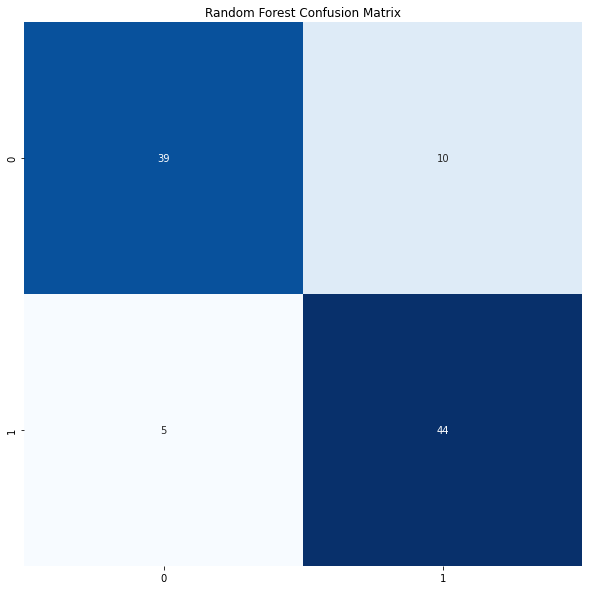

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,10))
plt.title("Random Forest Confusion Matrix")
sns.heatmap(cm_rf,annot=True,cmap="Blues",fmt="d",cbar=False)

# Random Forest Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110, 130],
    'min_samples_leaf': [3, 4, 5,6,8],
    'min_samples_split': [8, 10, 12,24,36],
    'n_estimators': [100, 200, 300, 1000]
}


In [ ]:
rf1 = RandomForestClassifier()

In [ ]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf1, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2)

In [ ]:
# Fit the grid search to the data
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 500 candidates, totalling 2500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   16.1s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 1009 tasks      | elapsed:  8.0min
[Parallel(n_jobs=-1)]: Done 1454 tasks      | elapsed: 11.6min
[Parallel(n_jobs=-1)]: Done 1981 tasks      | elapsed: 15.9min
[Parallel(n_jobs=-1)]: Done 2500 out of 2500 | elapsed: 20.0min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [ ]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 130,
 'min_samples_leaf': 3,
 'min_samples_split': 36,
 'n_estimators': 200}

In [ ]:
best_grid = grid_search.best_estimator_
grid_accuracy = cross_validate(best_grid, X_test, y_test)

In [ ]:
rf2 = RandomForestClassifier(bootstrap = True,
 max_depth= 130,
 min_samples_leaf= 3,
 min_samples_split= 36,
 n_estimators=200 )

In [ ]:
rf2.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=130, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=36,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
print("Random Forest Algorithm after Hyperparameter Accuracy Score : {:.2f}%".format(rf2.score(X_test,y_test)*100))

Random Forest Algorithm after Hyperparameter Accuracy Score : 84.69%


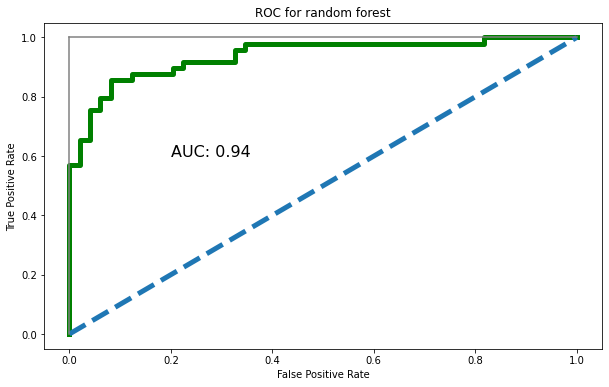

In [ ]:
# ROC Curve
from sklearn.metrics import roc_auc_score,roc_curve
y_probabilities = rf2.predict_proba(X_test)[:,1]
false_positive_rate, true_positive_rate, threshold_knn = roc_curve(y_test,y_probabilities)
plt.figure(figsize=(10,6))
plt.title('ROC for random forest')
plt.plot(false_positive_rate, true_positive_rate, linewidth=5, color='green')
plt.plot([0,1],ls='--',linewidth=5)
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.text(0.2,0.6,'AUC: {:.2f}'.format(roc_auc_score(y_test,y_probabilities)),size= 16)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

# K-Nearest Neighbour

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_train, y_train)
prediction = knn.predict(X_test)

print("{} NN Score: {:.2f}%".format(2, knn.score(X_test, y_test)*100))

2 NN Score: 83.67%


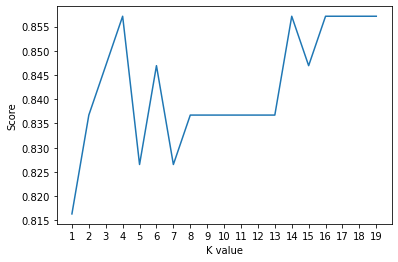

KNN Score Max 85.71%


In [ ]:
scoreList = []
for i in range(1,20):
    knn2 = KNeighborsClassifier(n_neighbors = i)  # n_neighbors means k
    knn2.fit(X_train, y_train)
    scoreList.append(knn2.score(X_test, y_test))
    
plt.plot(range(1,20), scoreList)
plt.xticks(np.arange(1,20,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()
print("KNN Score Max {:.2f}%".format((max(scoreList))*100))

In [ ]:
from sklearn.metrics import confusion_matrix
y_head_knn = knn2.predict(X_test)
cm_knn = confusion_matrix(y_test,y_head_knn)

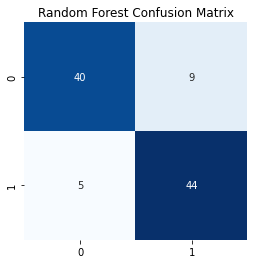

In [ ]:
plt.figure(figsize=(4,4))
plt.title("Random Forest Confusion Matrix")
sns.heatmap(cm_knn,annot=True,cmap="Blues",fmt="d",cbar=False)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_head_knn))

              precision    recall  f1-score   support

           0       0.89      0.82      0.85        49
           1       0.83      0.90      0.86        49

    accuracy                           0.86        98
   macro avg       0.86      0.86      0.86        98
weighted avg       0.86      0.86      0.86        98



# SVM


In [ ]:
from sklearn.svm import SVC

svm = SVC(random_state = 1)
svm.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
print("SVM ALgorithm Test Accuracy: {:.2f}%".format(svm.score(X_test,y_test)*100))

SVM ALgorithm Test Accuracy: 85.71%


# XGBoost

In [ ]:
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
print("XGBoost ALgorithm Test Accuracy: {:.2f}%".format(classifier.score(X_test,y_test)*100))

XGBoost ALgorithm Test Accuracy: 84.69%


In [ ]:
#Making the confusion matrix
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[37 12]
 [ 3 46]]


0.8469387755102041

**Applying k-Fold Cross Validation**

In [ ]:
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 79.32 %
Standard Deviation: 4.63 %


In [ ]:
xgb1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
xgb1.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=1,
              nthread=4, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=27,
              silent=None, subsample=0.8, verbosity=1)

In [ ]:
print("XGBoost ALgorithm Test Accuracy: {:.2f}%".format(xgb1.score(X_test,y_test)*100))

XGBoost ALgorithm Test Accuracy: 82.65%


In [ ]:
param_test2 = {
 'max_depth':[4,5,6],
 'min_child_weight':[4,5,6]
}
gsearch2 = GridSearchCV(estimator = XGBClassifier( learning_rate=0.1, n_estimators=140, max_depth=5,
 min_child_weight=2, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test2, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch2.fit(X_train,y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=0.8, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=5, min_child_weight=2,
                                     missing=None, n_estimators=140, n_jobs=1,
                                     nthread=4, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=27, silent=None,
                                     subsample=0.8, verbosity=1),
             iid=False, n_jobs=4,
             param_grid={'max_depth': [4, 5, 6], 'min_child_weight': [4, 5, 6]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc',

In [ ]:
gsearch2.best_params_

{'max_depth': 4, 'min_child_weight': 4}

**Tuning Gamma**

In [ ]:
param_test3 = {
 'gamma':[i/10.0 for i in range(0,5)]
}
gsearch3 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=4,
 min_child_weight=6, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test3, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch3.fit(X_train,y_train)
gsearch3.best_params_, gsearch3.best_score_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


({'gamma': 0.3}, 0.9043310341264306)

This shows that our original value of gamma, i.e. 0.3 is the optimum one. Before proceeding, a good idea would be to re-calibrate the number of boosting rounds for the updated parameters.

In [ ]:
xgb2 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=4,
 min_child_weight=6,
 gamma=0.3,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)

xgb2.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0.3,
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=6, missing=None, n_estimators=1000, n_jobs=1,
              nthread=4, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=27,
              silent=None, subsample=0.8, verbosity=1)

In [ ]:
print("XGBoost ALgorithm Test Accuracy: {:.2f}%".format(xgb2.score(X_test,y_test)*100))

XGBoost ALgorithm Test Accuracy: 84.69%


**Confusion Matrix**

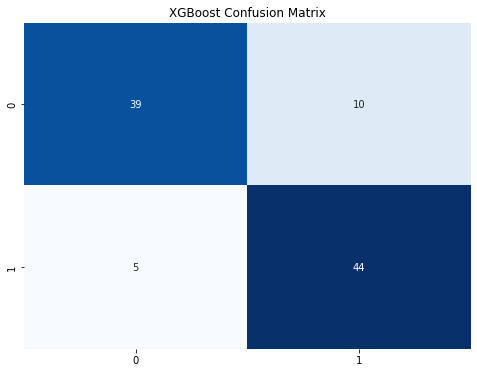

In [ ]:
from sklearn.metrics import confusion_matrix
y_head_rf = xgb2.predict(X_test)
cm_rf = confusion_matrix(y_test,y_head_rf)
import seaborn as sns
plt.figure(figsize=(8,6))
plt.title("XGBoost Confusion Matrix")
sns.heatmap(cm_rf,annot=True,cmap="Blues",fmt="d",cbar=False)